# Ward

Author: [Xin Feng](https://github.com/xf37)

This algorithm is an agglomerative clustering using ward linkage with a spatial connectivity constraint. Specifically, it is a "bottom-up" approach: each zone starts as its own cluster, and pairs of clusters are chosen to merge at each step in order to minimally increase a given linkage distance. Ward linkage refers to the variance of the clusters being merged. `Ward` algorithm in pysal/spopt is the function
([sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)) when the linkage criterion is ward. 

In [1]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

Last updated: 2022-10-17T21:38:40.039888-04:00

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : Clang 13.0.1 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [2]:
import geopandas
import libpysal
from libpysal.examples import load_example
import matplotlib.pyplot as plt
import spopt
from spopt.region import WardSpatial

plt.rcParams["figure.figsize"] = [12, 8]

%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.3.1

spopt     : 0.4.1+200.g336f235.dirty
libpysal  : 4.6.2
json      : 2.0.9
geopandas : 0.11.1
matplotlib: 3.6.1



## Airbnb Spots Clustering in Chicago

To illustrate `Ward` we utilize data on Airbnb spots in Chicago, which can be downloaded from [libpysal.examples](https://pysal.org/notebooks/lib/libpysal/Example_Datasets.html).

We can first explore the data by plotting the number of Airbnb spots in each community in the sample, using a quintile classification:

In [3]:
load_example("AirBnB")

Example not available: AirBnB
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


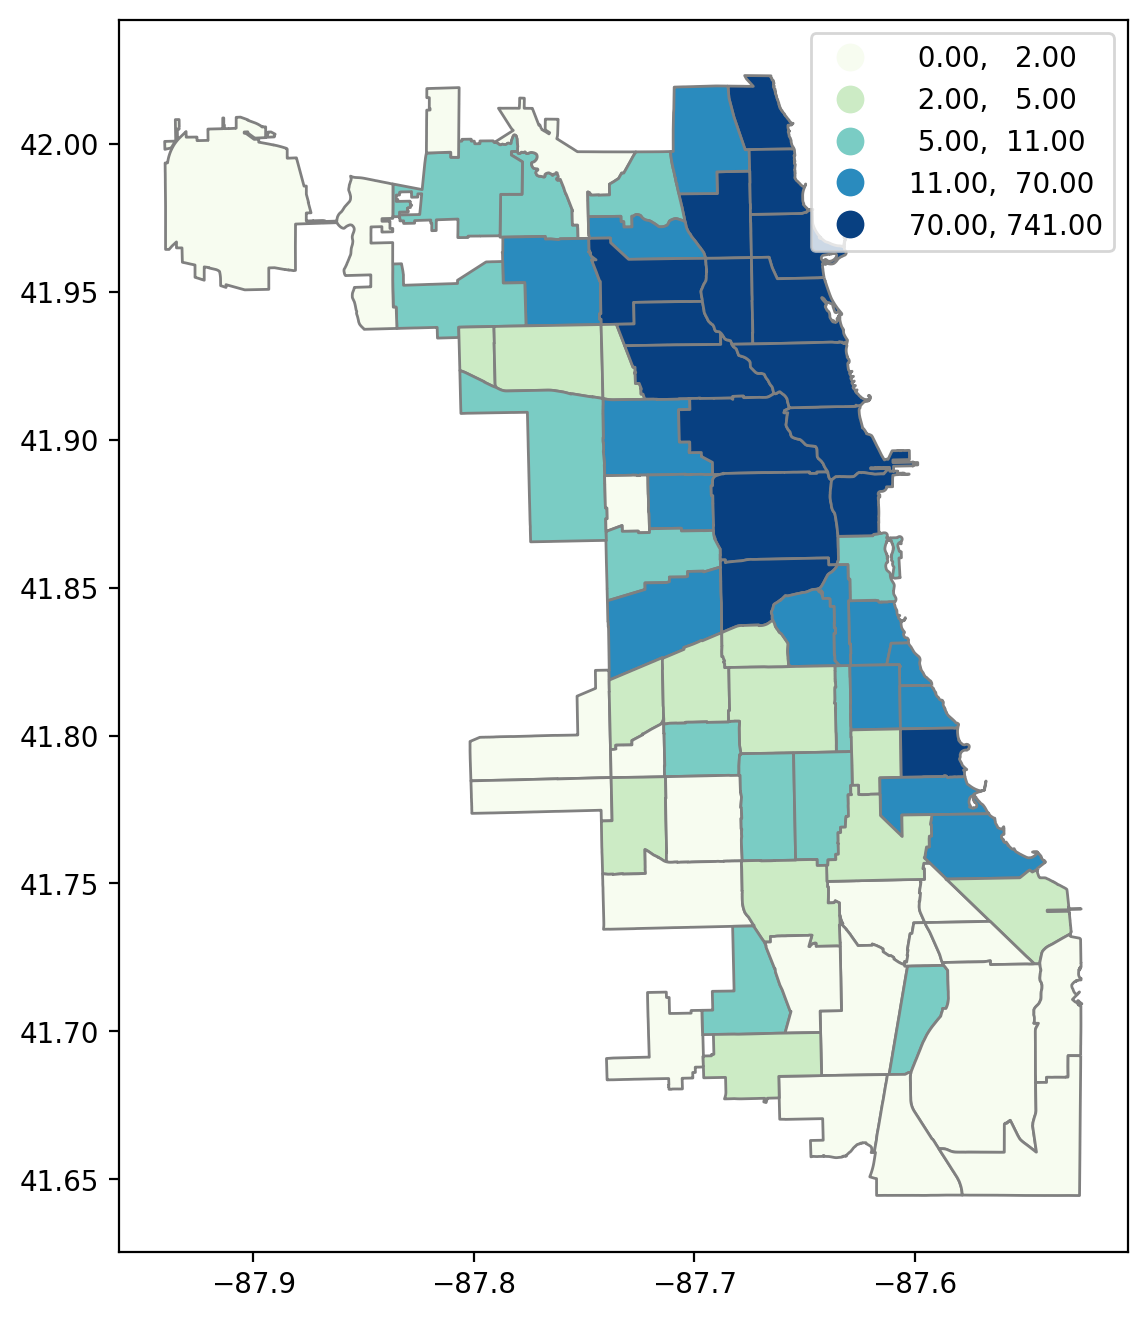

In [4]:
pth = libpysal.examples.get_path("airbnb_Chicago 2015.shp")
chicago = geopandas.read_file(pth)
chicago.plot(
    column="num_spots", scheme="Quantiles", cmap="GnBu", edgecolor="grey", legend=True
);

## Regionalization

With `Ward`, we can aggregate these 77 communities into 5 clusters. During the merging process, the variance of the clusters is minimized.

We first define the variable that will be used to measure the variance of clusters. The variable is the number of Airbnb spots in each community in this case.

In [5]:
attrs_name = ["num_spots"]

Next, we specify a number of other parameters that will serve as input to the `Ward` model.

A [spatial weights object](https://pysal.org/libpysal/tutorial.html) describes the spatial connectivity of the spatial objects:

In [6]:
w = libpysal.weights.Queen.from_dataframe(chicago)

The number of clusters that we would like to group these counties into:

In [7]:
n_clusters = 5

There are also some optional parameters about clustering in ([sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)). They can be added in the `Ward` function as a dictionary. In this example, we only use the default settings, you can define them as needed.

The model can then be solved:

In [8]:
model = WardSpatial(chicago, w, attrs_name, n_clusters)
model.solve()

In [9]:
chicago["ward_new"] = model.labels_

In [10]:
chicago["number"] = 1
chicago[["ward_new", "number"]].groupby(by="ward_new").count()

,number
ward_new,
0,3
1,2
2,3
3,62
4,7


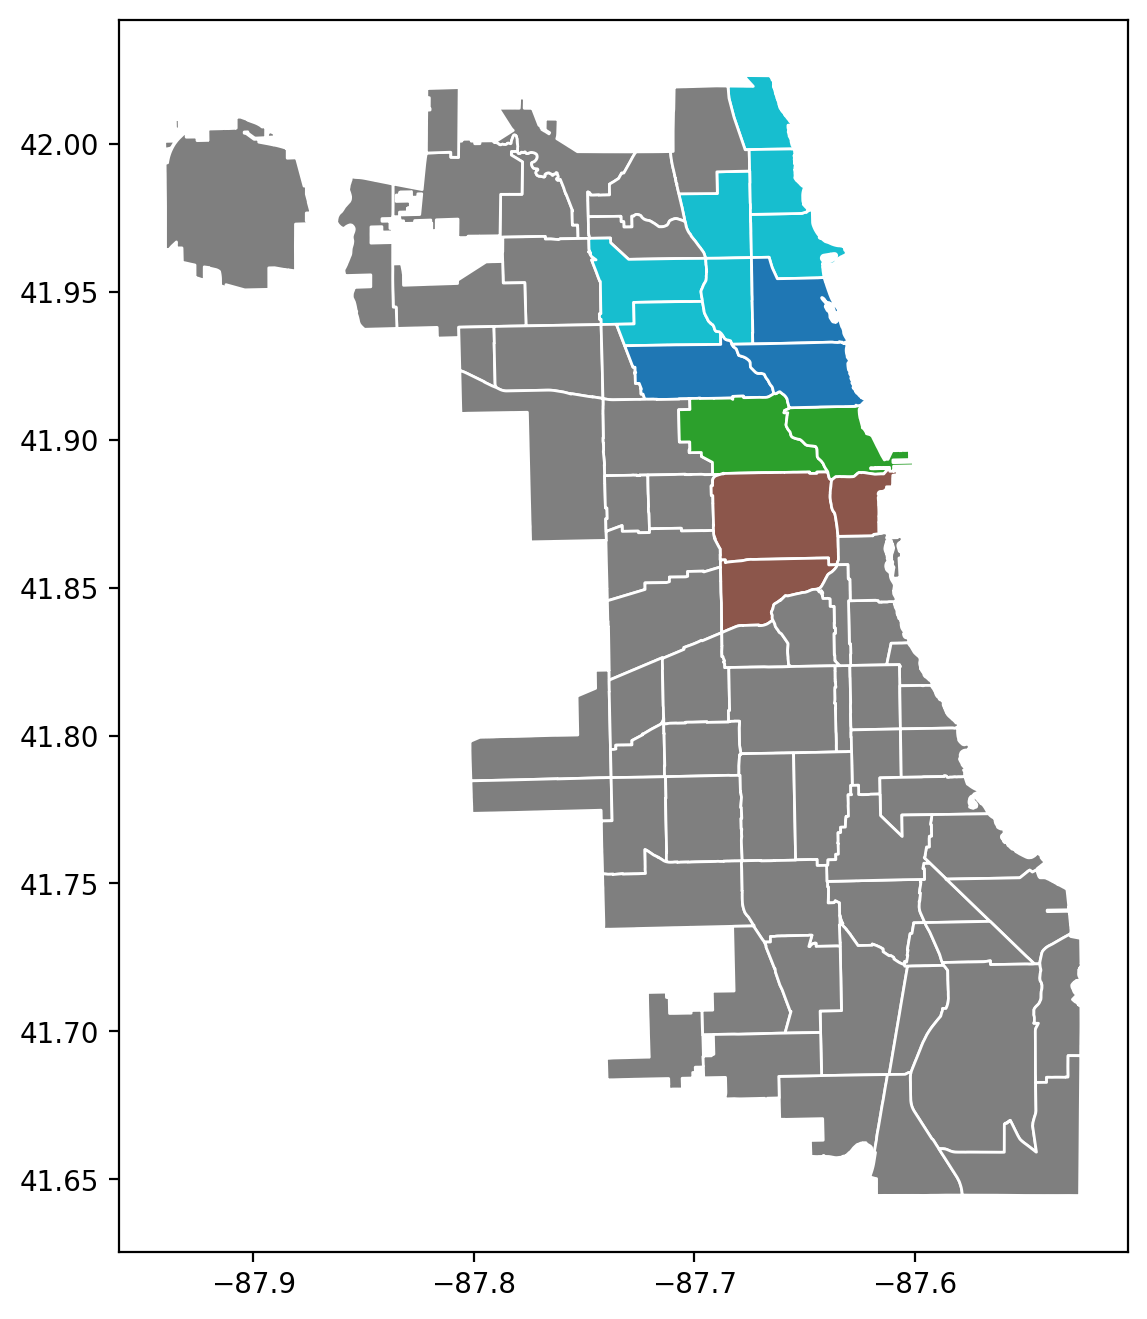

In [11]:
chicago.plot(column="ward_new", categorical=True, edgecolor="w");

The model solution results in five clusters, two of which have three communities, one with two, one with seven, and one with sixty-two communities. 